# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

0it [00:00, ?it/s]

100%|█████████▉| 26419200/26421880 [01:48<00:00, 193319.35it/s] 

Extracting /home/dockeruser/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /home/dockeruser/.pytorch/F_MNIST_data/FashionMNIST/raw



0it [00:00, ?it/s]


 56%|█████▌    | 16384/29515 [00:00<00:00, 54631.79it/s]

0it [00:00, ?it/s]

Extracting /home/dockeruser/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /home/dockeruser/.pytorch/F_MNIST_data/FashionMNIST/raw




  0%|          | 0/4422102 [00:00<?, ?it/s]

  0%|          | 16384/4422102 [00:01<01:22, 53428.17it/s]

  1%|          | 49152/4422102 [00:01<01:09, 63015.42it/s]

  2%|▏         | 90112/4422102 [00:01<00:51, 84133.07it/s]

  2%|▏         | 106496/4422102 [00:01<00:51, 83575.93it/s]

  3%|▎         | 139264/4422102 [00:02<00:46, 91254.60it/s]

  4%|▍         | 196608/4422102 [00:02<00:39, 106427.81it/s]

  6%|▌         | 245760/4422102 [00:02<00:33, 123068.14it/s]

  6%|▌         | 262144/4422102 [00:02<00:31, 132782.66it/s]

  7%|▋         | 303104/4422102 [00:02<00:27, 150538.32it/s]

  7%|▋         | 327680/4422102 [00:03<00:25, 162432.08it/s]

  8%|▊         | 368640/4422102 [00:03<00:25, 159694.19it/s]

 10%|▉         | 425984/4422102 [00:03<00:21, 185648.33it/s]

 10%|█         | 450560/4422102 [00:03<00:23, 170308.07it/s]

 11%|█         | 491520/4422102 [00:03<00:19, 201207.73it/s]

 12%|█▏        | 516096/4422102 [00:03<00:22, 175723.26it/s]

 13%|█▎        | 565248/4422102

Extracting /home/dockeruser/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /home/dockeruser/.pytorch/F_MNIST_data/FashionMNIST/raw





8192it [00:00, 11971.00it/s]            


Extracting /home/dockeruser/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /home/dockeruser/.pytorch/F_MNIST_data/FashionMNIST/raw
Processing...
Done!


Here we can see one of the images.

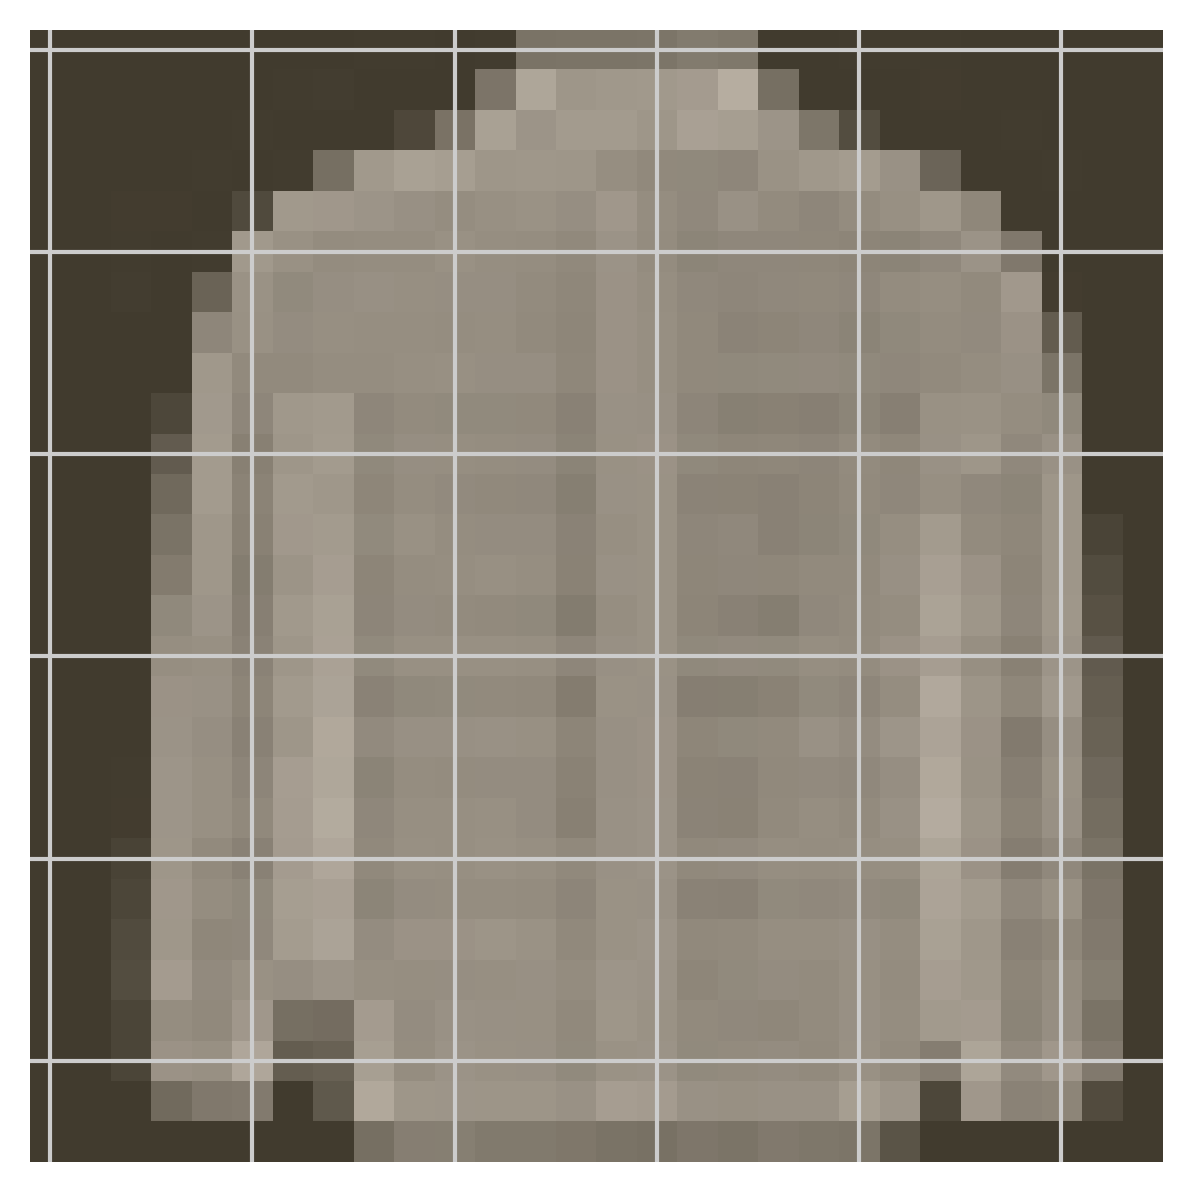

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [4]:
# TODO: Define your network architecture here

import torch
from torch import nn
import torch.nn.functional as F

model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [6]:
# TODO: Create the network, define the criterion and optimizer
# define the loss
criterion = nn.CrossEntropyLoss()

# update weights
from torch import optim 

optimizer = optim.SGD(model.parameters(), lr=0.002)

In [7]:
# TODO: Train the network here

# running the training loop
epochs = 7
for e in range(epochs): 
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        # clear the gradients
        optimizer.zero_grad()
        
        # forward pass
        output = model(images)
        
        # loss
        loss = criterion(output, labels)
        
        # backward pass
        loss.backward()
        
        # update weights
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.8951721693406989
Training loss: 1.0636899197406606
Training loss: 0.7949846532426155
Training loss: 0.6956380812216924
Training loss: 0.6407868232109399
Training loss: 0.6027309649280393
Training loss: 0.5724889666541044


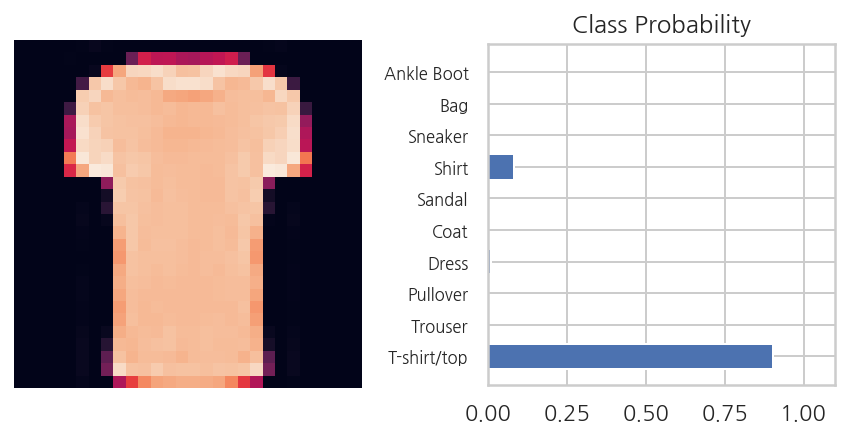

In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')